# Assignment #3 - Neural Networks

### <font color="red"> DUE: Mar 13 (Tuesday) 11:00 pm </font>  

<font color="blue"> Pa Pa Oo </font>

# I. Overview

The goal of this activity is to implement a very basic neural network which applies nonlinear regression. Also, it allow us to understand and use k-fold cross validation to find a good neural network parameters and report its accuracies and errors.

# II. Data
## Description of your data


Car Evaluation Dataset

This dataset includes 1728 instances about cars’ standard. The data contains categorical values, I converted those features into integers. The quality of cars is measured by two main groups of standards which are price (buying price and maintenance cost) and technical characteristics (comfort and safety). The level of comfort is determined by number of persons can fit in the car, number of doors and luggage boot size. Applying classification model will allow us to know which car criteria is likely will be pass the evaluation and which decision nodes are significant in classifying. 
Attributes Information buying price: vhigh, high, med, low. maintenance cost: vhigh, high, med, low. number of doors: 2, 3, 4, 5more. number of persons: 2, 4, more. luggage boot size: small, med, big. safety: low, med, high Class Values: classification: unacc, acc, good, vgood

# Reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from copy import deepcopy as copy
from IPython.core.debugger import set_trace
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df_col_names = ['buying price','maintenance cost','number of doors','number of persons','luggage boot size', 'safety', 'rate']

# header argument says the first line is a datapoint, not column names. 
# names argument says what to use as the column names
df = pd.read_csv('car.data', header=None, names=df_col_names)

df

,buying price,maintenance cost,number of doors,number of persons,luggage boot size,safety,rate
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
#Convert feature values to integers (0, 1,2,3,4,5)
df['buying price'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
df['maintenance cost'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
# df['number of doors'].replace('5more', 5, inplace = True)
# df['number of persons'].replace('more', 5, inplace = True)
df['luggage boot size'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)
df['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)
df['rate'].replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)

In [5]:
df.shape

(1728, 7)

In [6]:
#Convert feature values to integers (0, 1,2,3,4,5)

doors = {'1': 1, '2':2, '3':3, '4':4,'5more':5}
persons = {'1': 1, '2':2, '3':3, '4':4, 'more':5}

#TODO: Convert the string values in columns 'month' and 'day' to integers like we did last week.
df['number of doors'] = df['number of doors'].apply(lambda x: doors[x])
df['number of persons'] = df['number of persons'].apply(lambda x: persons[x])
df

,buying price,maintenance cost,number of doors,number of persons,luggage boot size,safety,rate
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


In [7]:
# check missing values in variables
df.isnull().sum()

buying price         0
maintenance cost     0
number of doors      0
number of persons    0
luggage boot size    0
safety               0
rate                 0
dtype: int64

In [8]:
rate = df['rate'].value_counts().sort_index()
rate

0    1210
1     384
2      69
3      65
Name: rate, dtype: int64

In [9]:
# Assign the three X, T, and N variables with proper values.
X = df.loc[:, df.columns!= 'rate']
T = df.rate
N = len(df)

In [10]:
X

,buying price,maintenance cost,number of doors,number of persons,luggage boot size,safety
0,3,3,2,2,0,0
1,3,3,2,2,0,1
2,3,3,2,2,0,2
3,3,3,2,2,1,0
4,3,3,2,2,1,1
...,...,...,...,...,...,...
1723,0,0,5,5,1,1
1724,0,0,5,5,1,2
1725,0,0,5,5,2,0
1726,0,0,5,5,2,1


In [11]:
T = df[['rate']].copy()
T

,rate
0,0
1,0
2,0
3,0
4,0
...,...
1723,2
1724,3
1725,0
1726,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   buying price       1728 non-null   int64
 1   maintenance cost   1728 non-null   int64
 2   number of doors    1728 non-null   int64
 3   number of persons  1728 non-null   int64
 4   luggage boot size  1728 non-null   int64
 5   safety             1728 non-null   int64
 6   rate               1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


# Plots to visualize data

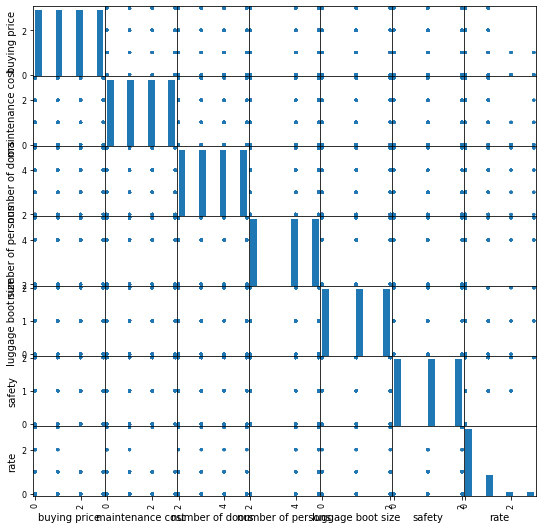

In [13]:
from pandas.plotting import scatter_matrix

Data = pd.concat([X, T], axis=1)
scatter_matrix(Data, alpha=0.4, figsize=(9,9));

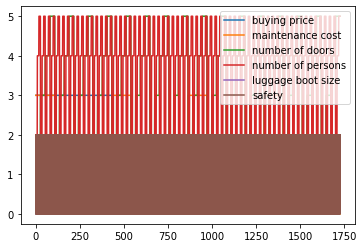

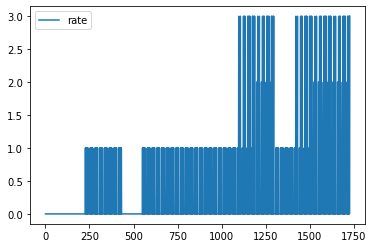

In [14]:
X.plot()
T.plot()

In [15]:
classification = df['rate'].value_counts().sort_index()
classification

0    1210
1     384
2      69
3      65
Name: rate, dtype: int64

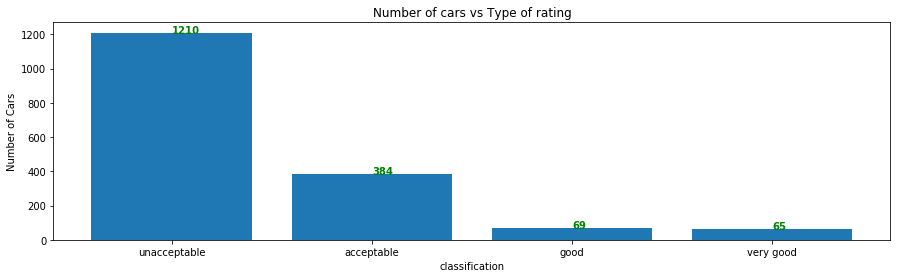

In [16]:
# Plots
Index = [1,2,3,4]
plt.figure(figsize=(15,4))
plt.bar(Index,classification,color = 'blue')
plt.xticks(Index,['unacceptable','acceptable','good','very good'],rotation=360)
plt.ylabel('Number of Cars')
plt.xlabel('classification')
plt.title('Number of cars vs Type of rating')
plt.bar(Index, classification)
for a,b in zip(Index, classification):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')
plt.show()

# sns.countplot(df['rate'])

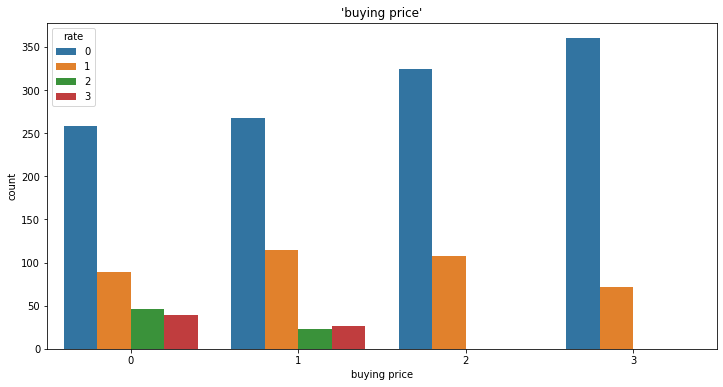

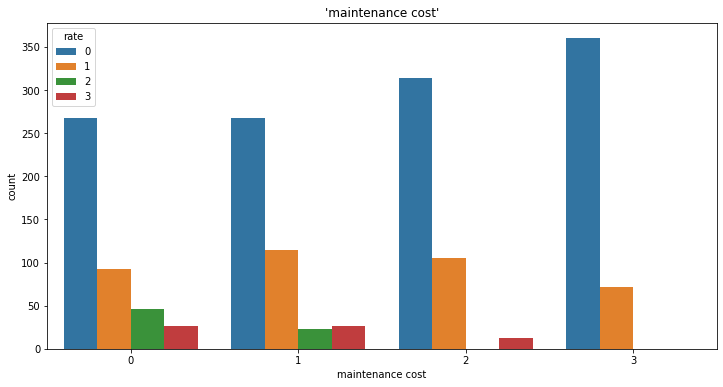

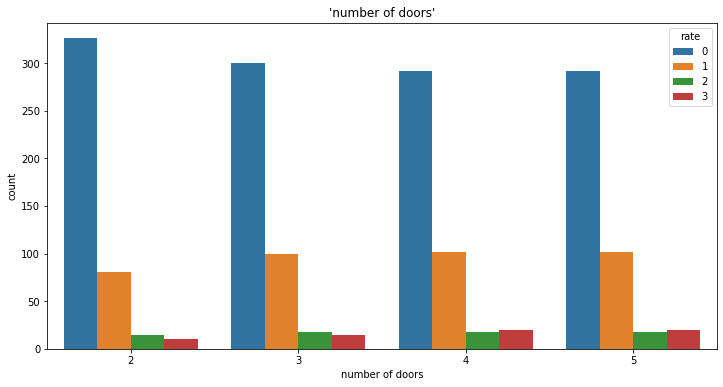

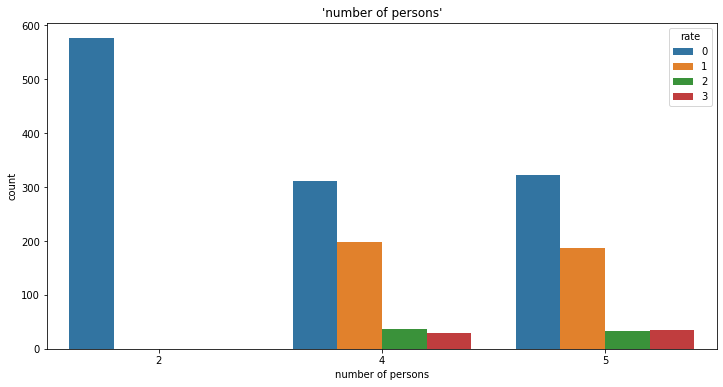

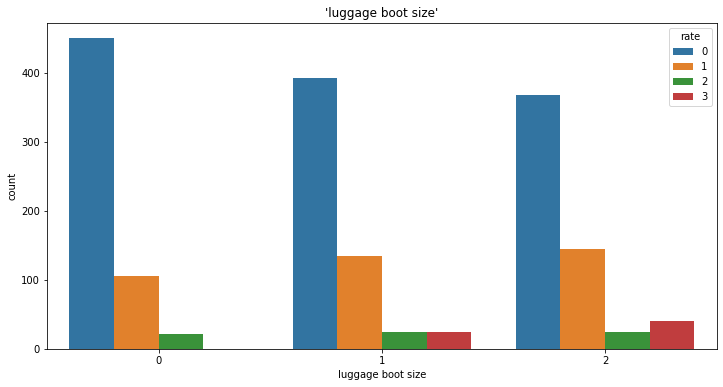

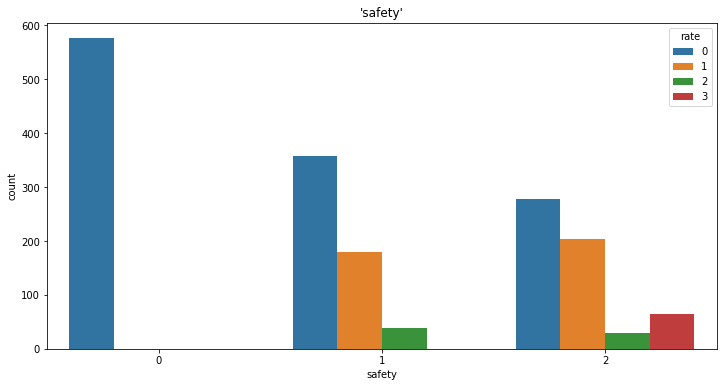

In [17]:
for i in df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("'%s'"%i)
    sns.countplot(df[i],hue=df['rate'])

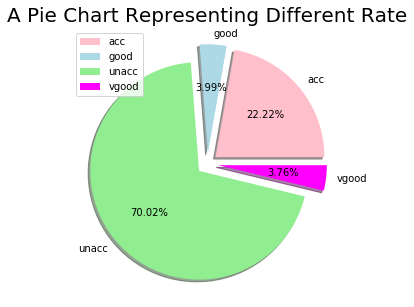

In [18]:
labels = ['acc', 'good', 'unacc', 'vgood']
colors = ['pink', 'lightblue', 'lightgreen', 'magenta']
size = [384, 69, 1210, 65]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Different Rate', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

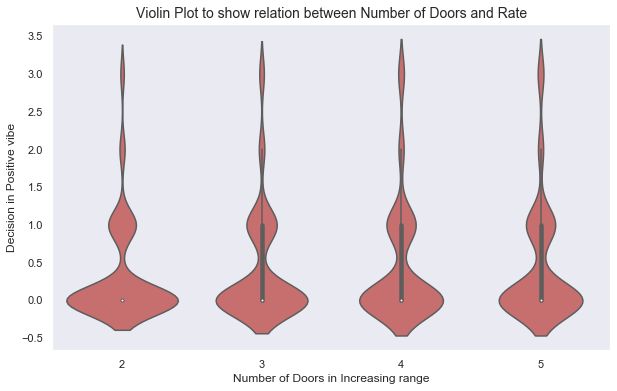

In [19]:
sns.set(style = 'dark', palette = 'muted', color_codes = True)
plt.rcParams['figure.figsize'] = (10, 6)

ax = sns.violinplot(x = df['number of doors'], y = df['rate'], color = 'r')
ax.set_title('Violin Plot to show relation between Number of Doors and Rate', fontsize = 14)
ax.set_xlabel('Number of Doors in Increasing range', fontsize = 12)
ax.set_ylabel('Decision in Positive vibe')
plt.show()

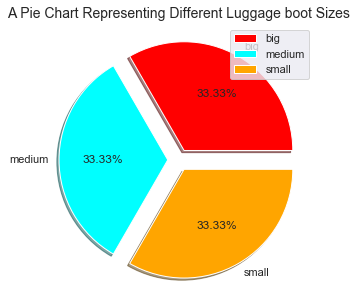

In [20]:
labels = ['big', 'medium', 'small',]
colors = ['red', 'cyan', 'orange']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Different Luggage boot Sizes', fontsize = 14)
plt.axis('off')
plt.legend()
plt.show()

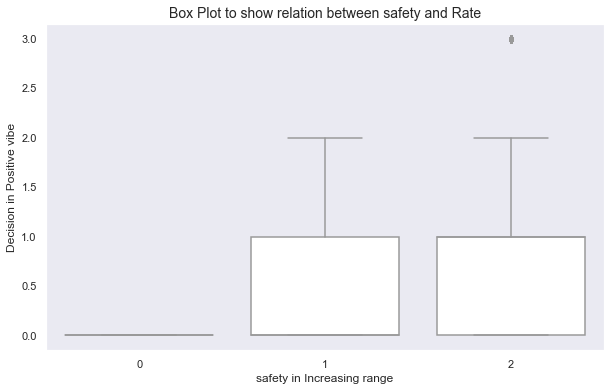

In [21]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (10, 6)

ax = sns.boxplot(x = df['safety'], y = df['rate'], color = 'w')
ax.set_title('Box Plot to show relation between safety and Rate', fontsize = 14)
ax.set_xlabel('safety in Increasing range', fontsize = 12)
ax.set_ylabel('Decision in Positive vibe')
plt.show()

# Analyzing the plots

    Plotting is important in machine learning because it is very useful and helpful under several conditions, for instance, when visualized information is easier and more effective than descriptive statistics. Furthermore, it also helps to see the correlations between sets of data and recognition of patterns, resulting the users to understand data in an effective and efficient manner.
    There are many criteria in consideration of buying a car such as price, comfort, safety and cost. As seen from the pie chart above, number of doors are not a significant factor of considering in buying a car. Furthermore, maintenance cost is more likely higher for cars which recommended as “unacceptable” and “acceptable”. As seen from the plots above, number of persons fit into a car is one of the criteria when people evaluate cars. 

In [22]:
Ti = pd.get_dummies(df['rate'])
Ti

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1723,0,0,1,0
1724,0,0,0,1
1725,1,0,0,0
1726,0,0,1,0


In [23]:
# Convert to numpy arrays
X = X.values
T = T.values 

In [24]:
X

array([[3, 3, 2, 2, 0, 0],
       [3, 3, 2, 2, 0, 1],
       [3, 3, 2, 2, 0, 2],
       ...,
       [0, 0, 5, 5, 2, 0],
       [0, 0, 5, 5, 2, 1],
       [0, 0, 5, 5, 2, 2]], dtype=int64)

In [25]:
T

array([[0],
       [0],
       [0],
       ...,
       [0],
       [2],
       [3]], dtype=int64)

In [26]:
# Splitting the training and test data
# ratio=[0.75, 0.25])
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ttrain, Ttest = train_test_split(X, T, test_size=0.25)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (1296, 6)
Train target shape: (1296, 1)
Test data shape: (432, 6)
Test target shape: (432, 1)


In [27]:
N = X.shape[0] # Number of data samples
D = X.shape[1] # Number of data features
K = T.shape[1] # Number of output values
Ntrain = Xtrain.shape[0] # Number of train data samples
Ntest = Xtest.shape[0] # Number of test data samples
print("N = {} total data samples".format(N))
print("D = {} data features".format(D))
print("K = {} data features".format(K))
print("Ntrain = {} training data samples".format(Ntrain))
print("Ntest = {} testing data samples".format(Ntest))

N = 1728 total data samples
D = 6 data features
K = 1 data features
Ntrain = 1296 training data samples
Ntest = 432 testing data samples


In [28]:
# Check if split is actually correct
# We can see it's roughly 75% train and 25% test
print(X.shape[0])
print(float(Xtrain.shape[0]) / float(X.shape[0]))
print(float(Xtest.shape[0]) / float(X.shape[0]))

1728
0.75
0.25


In [29]:
mu = np.mean(Xtrain, axis=0)
mu

array([1.49537037, 1.5308642 , 3.50925926, 3.66589506, 1.00925926,
       1.00617284])

In [30]:
sigma = np.std(Xtrain, axis=0)
sigma

array([1.10832018, 1.11760789, 1.10898717, 1.25041122, 0.81738861,
       0.81647325])

In [31]:
def standardize(X):  
    mean = np.mean(Xtrain, axis=0)    
    std = np.std(Xtrain, axis=0)
    return (X - mean) /(std)

In [32]:
XtrainS = standardize(Xtrain)
XtestS = standardize(Xtest)

In [33]:
XtrainS

array([[ 0.45531033, -0.4750004 , -0.45921114, -1.33227777,  1.21208043,
        -0.00756037],
       [-1.34922236, -1.3697686 , -0.45921114,  0.26719605, -1.23473614,
        -1.23234024],
       [ 0.45531033,  1.31453599, -1.36093483,  0.26719605, -0.01132785,
         1.2172195 ],
       ...,
       [ 1.35757668,  1.31453599, -0.45921114, -1.33227777,  1.21208043,
         1.2172195 ],
       [-0.44695601, -0.4750004 , -1.36093483, -1.33227777,  1.21208043,
        -0.00756037],
       [-0.44695601, -1.3697686 ,  0.44251255,  0.26719605, -0.01132785,
        -0.00756037]])

In [34]:
XtestS

array([[ 1.35757668, -1.3697686 ,  0.44251255, -1.33227777, -0.01132785,
        -0.00756037],
       [-1.34922236,  0.4197678 ,  1.34423624, -1.33227777,  1.21208043,
         1.2172195 ],
       [ 0.45531033,  1.31453599, -0.45921114, -1.33227777, -0.01132785,
         1.2172195 ],
       ...,
       [ 1.35757668, -0.4750004 , -1.36093483,  1.06693296,  1.21208043,
        -1.23234024],
       [ 1.35757668,  1.31453599, -0.45921114,  0.26719605, -1.23473614,
        -0.00756037],
       [ 0.45531033, -1.3697686 ,  1.34423624,  0.26719605,  1.21208043,
        -1.23234024]])

In [35]:
print("Xtrain shape: {}".format(Xtrain.shape))
print("mu shape: {}".format(mu.shape))
print("sigma shape: {}".format(sigma.shape))

Xtrain shape: (1296, 6)
mu shape: (6,)
sigma shape: (6,)


In [37]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        """ Set STD """
        self._sigma[:] = s

    def standardize(self, X):
        """ Convert passed data to have a mean of 0 and STD of 1"""
        # TODO (1)
        return (X - self._mu) /(self._sigma) 

    def unstandardize(self, X):
        """ Convert standardized data back to its orignal scale """
        return (X * self._sigma) + self._mu 

In [41]:
Xstrain = Xtrain.copy() 
X1strain = np.hstack((np.ones((Ntrain, 1)), Xstrain))
X1strain[:5, :]

array([[1., 2., 1., 3., 2., 2., 1.],
       [1., 0., 0., 3., 4., 0., 0.],
       [1., 2., 3., 2., 4., 1., 2.],
       [1., 2., 0., 3., 5., 0., 2.],
       [1., 1., 0., 4., 5., 0., 0.]])

In [46]:
Xstest = Xtest.copy() 
X1stest = np.hstack((np.ones((Ntest, 1)), Xstest))
Ytest_ls = X1stest @ w

In [47]:
print("Normalized Xtrain with bias added shape: {}".format(X1strain.shape,))
print("Ttrain shape: {}".format(Ttrain.shape))

Normalized Xtrain with bias added shape: (1296, 7)
Ttrain shape: (1296, 1)


In [48]:
X1_inverse = np.linalg.pinv(X1strain.T @ X1strain)
w = X1_inverse @ X1strain.T @ Ttrain
Ytrain_ls = X1strain @ w

# III. Methods

Summary of CV & correctness of implementation

please refer to another notebook for summary CV and its implementation 

## III.A Nonlinear Regression 

## Summary of non-linear regression

Nonlinear regression is a form of regression analysis in which data is fit to a model and then expressed as a mathematical function. Simple linear regression relates two variables (X and Y) with a straight line (y = mx + b), while nonlinear regression must generate a line (typically a curve) as if every value of Y was a random variable. The goal of the model is to make the sum of the squares as small as possible. The sum of squares is a measure that tracks how much observations vary from the mean of the data set. It is computed by first finding the difference between the mean and every point of data in the set. Then, each of those differences is squared. Lastly, all of the squared figures are added together. The smaller the sum of these squared figures, the better the function fits the data points in the set.

In [49]:
def addOnes(A):
    """Adds bias to passed data"""
    return np.insert(A, 0, 1, axis=1)

In [50]:
# N, D, Ntrain, and Ntest were all previously set
# Now, set the number of outputs, which will be one since we are preforming regression
K = Ttrain.shape[1] if len(Ttrain.shape) == 2 else 1

# Set parameters of neural network
hidden_units = 5

rho_v = 0.01
rho_w = 0.01

rho_v_scaled = rho_v / (Ntrain*K)
rho_w_scaled = rho_w / (Ntrain*K)

# Number of graident descent steps to take when searching for a minimum in mean-squared-error space
steps = 30000

###########################################################################
# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(D+1,hidden_units))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+hidden_units,K))-0.5)

###########################################################################
# collect training and testing errors for plotting
errorTrace = np.zeros((steps,2))

fig = plt.figure(figsize=(10,8))
for s in range(steps):

    # Forward pass on training data
    # TODO (1)
    Z = np.tanh(X1strain @ V)
    
    # TODO (2)
    Z1 = addOnes(Z)
    
    # TODO (3)
    Ytrain = Z1 @ W
    
    # Error in output
    error = Ttrain - Ytrain

    # Backward pass - the backpropagation and weight update steps
    # TODO (4)
    V = V + rho_v_scaled  * X1strain.T @ ( ( error @ W[1:,:].T) * (1-Z**2))
    
    # TODO (5)
    W = W + rho_w_scaled  * Z1.T @ error

#     W = np.linalg.inv(X1strain.T @ X1strain) @ X1strain.T @ Ttrain
    # Train error trace for plotting later
    errorTrace[s,0] = np.sqrt(np.mean((error**2)))
    
    # Test error trace for plotting later
    Ytest = addOnes(np.tanh(X1stest @ V)) @ W  # Forward pass in one line!
    errorTrace[s,1] = np.sqrt(np.mean((Ytest-Ttest)**2))
    


<Figure size 720x576 with 0 Axes>

In [53]:
def plot_fit(Y, T, title=None):
    """ Plot the passed predictions and targets while also computing
        and printing the RMSE.
    """
    plt.plot(T, label="target")
    plt.plot(Y, linewidth=3, label="prediction")
    plt.legend()
    plt.ylabel("Allometry")
    plt.xlabel("Samples")
    plt.title(title)
    # RMSE
    rmse = np.sqrt(np.mean((Y - T)**2))
    print("RMSE: {}".format(rmse))

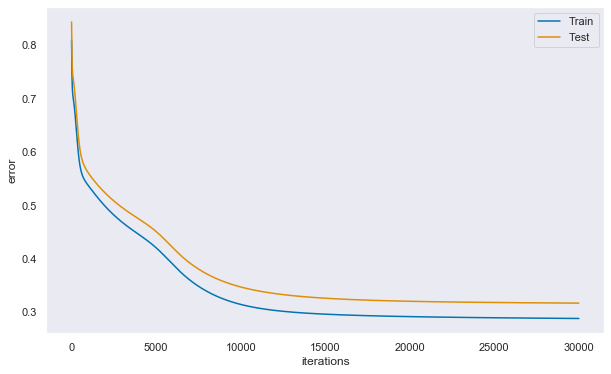

In [51]:
plt.plot(errorTrace)
plt.legend(('Train','Test'))
plt.xlabel("iterations")
plt.ylabel("error");

RMSE: 0.2883427353627609


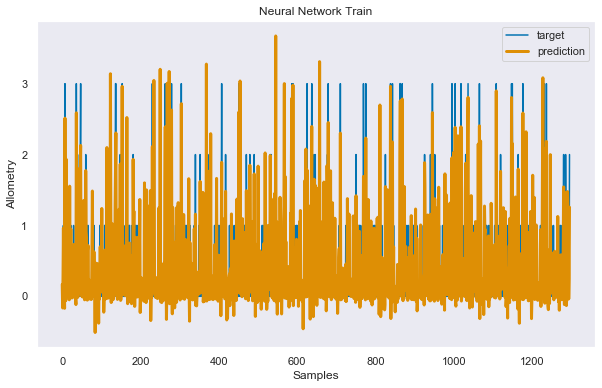

In [54]:
Ytrain_nn = addOnes(np.tanh(X1strain @ V)) @ W  #!! Forward pass in one line

plot_fit(Ytrain_nn, Ttrain, title = "Neural Network Train")

RMSE: 0.31706048957816635


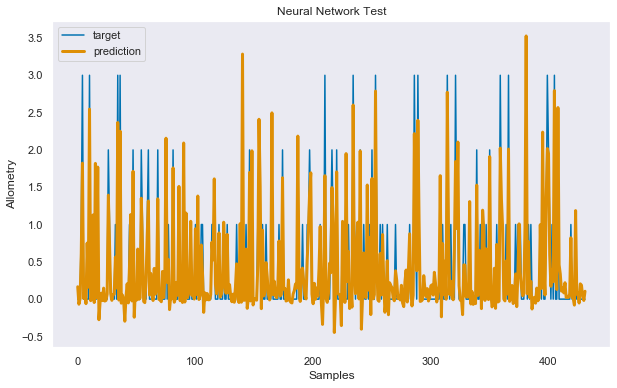

In [55]:
Ytest_nn = addOnes(np.tanh(X1stest @ V)) @ W  #!! Forward pass in one line

plot_fit(Ytest_nn, Ttest, title="Neural Network Test")

###  Analysis

RMSE: 0.31706048957816635


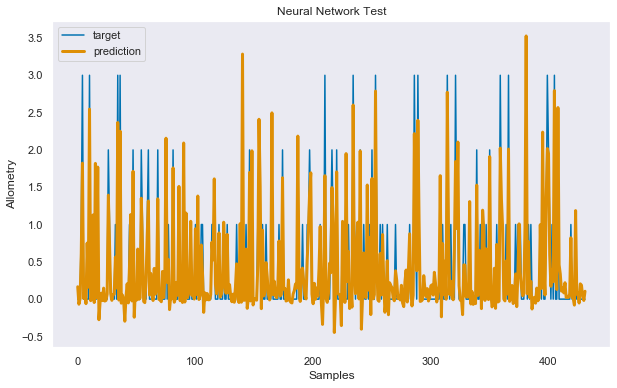

In [57]:
# nonlinear regression: neural network
plot_fit(Ytest_nn, Ttest,  title="Neural Network Test")

### Neural Network Class 

## 	Explanation of codes

Neural network is machine learning technique or algorithm that try to mimic the working of neuron in human brain for learning. At first it is unstable and after certain iteration of data it adjust itself such that it’s accuracy increases.
Here’s a brief overview of how a simple feedforward neural network works:
1.	Takes inputs as a matrix (2D array of numbers)
2.	Multiplies the input by a set weights (performs a dot product aka matrix multiplication)
3.	Applies an activation function
4.	Returns an output
5.	Error is calculated by taking the difference from the desired output from the data and the predicted output. This creates our gradient descent, which we can use to alter the weights
6.	The weights are then altered slightly according to the error.
7.	To train, this process is repeated 1,000+ times. The more the data is trained upon, the more accurate our outputs will be.


init function:  it initializes the nonlinear regression model and create the object of this class and passing an parameter nunits: number of attribuutes in our dataset, number of hidden units, and number of outputs. 

get_nlayers: number of layers in neural network

Set_hunit function: update or initiate the weights because it takes the weight as the parameter.

unpack: unpacks the multilple weights.

Forward function takes the neural network and the initial input (x) and pushes the input through the network. 

The role of an activation function is to introduce nonlinearity.

Backward function computes the gradient of the loss function with respect to the weights of the network for a single input–output.

errortf provides errors if there are any in the data set.

_objectf function calculates the error function.

train:it takes the feautures and the target as the input. The more the data is trained upon, the more accurate our outputs will be.

gradientf funtion upackes the weight. 

optimtarget function tries to reduce the error by using the object function and updates the weights accordingly.
use function returns predictted values.


In [37]:
import numpy as _np
from grad import scg, steepest
from copy import copy

class NeuralNet:

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc
        
        self._weights = np.random.uniform(-0.1,0.1, lenweights) # Initialize weights randomly
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end
        
        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        """ Add bias to passed weights and then return """
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        """ Return of layers """
        return self._nLayers

    def set_hunit(self, w):
        """ Set hidden unit weights """
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        """ Return a passed weights stacked """
        # Map applies a given function (np.ravel) to every
        # element in a given iterable (w). We then cast the out of map
        # as a list so the weights can be stacked into a numpy array.
        return np.hstack(list(map(np.ravel, w)))

    def unpack(self, weights):
        """ Update class weights with passed weights """
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        """ Return a copy of the class weights """
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X # t acts as the output for each layer
        Z = [] # Z stores the input of each layer (i.e. output of previous layer)

        # Loops through each layer in the neural network
        for layer in range(self._nLayers):
            Z.append(t) # Store the input for this layer
            
            # Check if the layer we are on is the last layer.
            # If so, then don't apply the activation function.
            if layer == self._nLayers - 1:
                # TODO (1): fill in for the last layer computation (dot product)
#                 t = np.tanh(self._nLayers[-1] @ Z ) 
                t = self.add_ones(t) @ self._W[layer]
                
            else:
                # TODO (2): fill in for the hidden layer computation (activation on linear model output)     
#                 t = np.tanh(self._W[1] @ Z )
                t = np.tanh(np.dot(self.add_ones(t), self._W[layer]))
               
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        """ Applies backwards pass to update all hidden layer weights """
        delta = error # Gradient from prvious layer, initialized to the error (T - Y)
        N = T.size # Targets
        dws = []
        # Loop backwards through the layers starting from the output
        for layer in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[layer]) / N # Learning rate for current layer
            if layer == 0:
                lmbterm = 0
            else:
                # Create a vector for regularization term
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[layer].shape[1])),
                            self._W[layer][1:,]))
            
            dws.insert(0,(-rh * (self.add_ones(Z[layer]).T @ delta) + lmbterm))
            
            # Calculate the gradient if current layer isn't the input layer
            if layer != 0:
                
                delta = np.dot(delta, self._W[layer][1:, :].T) * (1 - Z[layer]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        """ Calcuate the error between targets (T) and predictions (Y)"""
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        """ Calculate the RMSE for our targets and predications.
            Here wpenalty is our weights with a regularization 
            term applied.
        """
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):
    
        verbose = params.pop('verbose', False)
        # Pop training parameters from parameter dictionary
        _lambda = params.pop('Lambda', 0.) # Regularization parameter for loss function
        niter = params.pop('niter', 1000) # Number of epochs/steps
        
        # Pop metric parameters from parameter dictionary
        wprecision = params.pop('wprecision', 1e-10) # Stop training when weight updates don't exceed passed threshold
        fprecision = params.pop('fprecision', 1e-10) # Stop training when error doesn't exceed passed threshold
        wtracep = params.pop('wtracep', False) # Enable tracking of weights per step
        ftracep = params.pop('ftracep', False) # Enable tracking of erros per step

        # Pop type of optimization to use, defaults to scaled conjugate gradient (scg) 
        optim = params.pop('optim', 'scg')
        
        # Standardize parameters 
        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        # Sub-function of train() to be pased to scg or steepest below
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
        
         # Sub-function of train() to be pased to scg or steepest below
        def optimtargetf(weights):
            """ optimization target function : MSE """
            self.unpack(weights) # Save passed weights
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs) # Apply forward pass
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * (Wnb.flatten() @ Wnb.flatten())
            return self._objectf(T, Y, wpenalty)
        
        # Select to optimize with scaled conjugate gradient or
        #  with steepest decent.
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf, wPrecision=wprecision, fPrecision=fprecision,                     nIterations=niter,
                        wtracep=wtracep, ftracep=ftracep,
                        verbose=False)
            self.unpack(result['w'][:]) # Save updated weights
            self.f = result['f'] # Store error computed by scg
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:]) # Save updated weights
            
        # Check if error tracking is enabled
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        # Check if input data need to be standardized
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
            
        # Apply forward pass to get predictions
        Y, Z = self.forward(Xs)

        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        
        return Y


In [38]:
nHidden = 5
nn = NeuralNet([D, nHidden, K])
nn.train(Xtrain, Ttrain, ftracep = True)

Ytrain = nn.use(Xtrain)
print(Xtrain.shape)

(1296, 6)


## Implementation_LR

In [ ]:
# g(.) the softmax function

def softmax(z):
    if not isinstance(z, np.ndarray):
        z = np.asarray(z)
    f = np.exp(z) 
    return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

# for linear fx
def g(X, w):
    return softmax(X @ w) 

In [ ]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 2))
Ttrain[:50, 0] = 1
Ttrain[50:, 1] = 1

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 2))
Ttest[:20, 0] = 1
Ttest[20:, 1] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

# IV - Results

### Observing the learning curve:

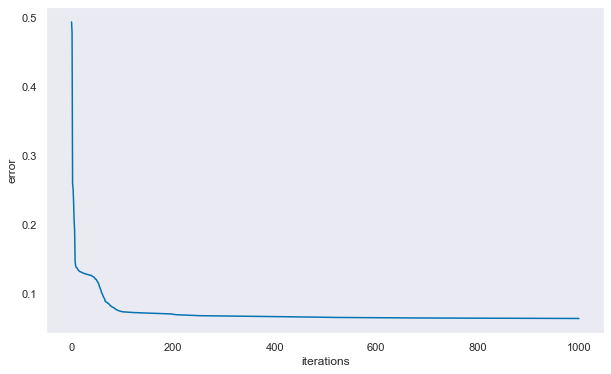

In [39]:
plt.plot(nn.ftrace)
plt.xlabel("iterations")
plt.ylabel("error");

### Plotting for results - NN

In [40]:
def plot_fit(Y, T, title=None):
    """ Plot the passed predictions and targets while also computing
        and printing the RMSE.
    """
    plt.plot(T, label="target")
    plt.plot(Y, linewidth=3, label="prediction")
    plt.legend()
    plt.ylabel("Allometry")
    plt.xlabel("Samples")
    plt.title(title)
    # RMSE
    rmse = np.sqrt(np.mean((Y - T)**2))
    print("RMSE: {}".format(rmse))

RMSE: 0.2680243972249545


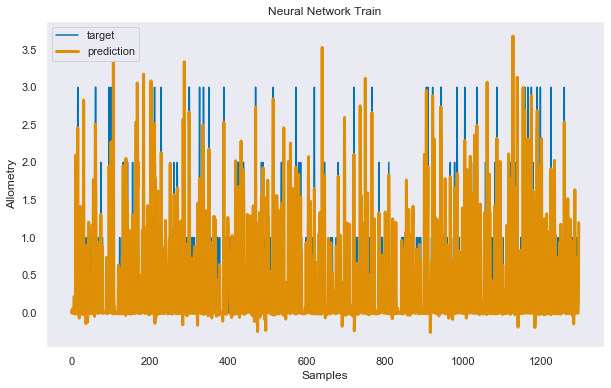

In [41]:
plot_fit(Ytrain, Ttrain, title="Neural Network Train")

RMSE: 0.293299938688185


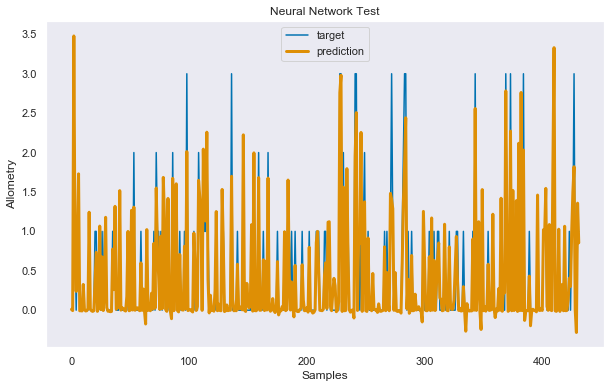

In [42]:
Ytest = nn.use(Xtest)

plot_fit(Ytest, Ttest, title="Neural Network Test")

Accuracy:  80.62407914817189 %


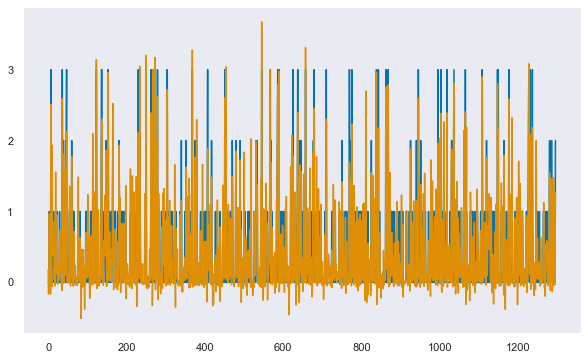

In [61]:
plt.plot(Ttrain)
plt.plot(Ytrain)
print("Accuracy: ", 100 - np.mean(np.abs(Ttrain -Ytrain)) * 100, "%")

In [48]:
nHidden = 5
nn = NeuralNet([D, nHidden, K])
nn.train(Xtrain, Ttrain, ftracep = True)
Ytrain = nn.use(Xtrain)

In [49]:
# repeating the previous example

# Make some training data
n = 20
X = np.linspace(0.,20.0,n).reshape((n,1)) - 10
T = 0.2 + 0.05 * (X+10) + 0.4 * np.sin(X+10) + 0.2 * np.random.normal(size=(n,1))

# Make some testing data
Xtest = X + 0.1*np.random.normal(size=(n,1))
Ttest = 0.2 + 0.05 * (Xtest+10) + 0.4 * np.sin(Xtest+10) + 0.2 * np.random.normal(size=(n,1))

nSamples = X.shape[0]
nOutputs = T.shape[1]

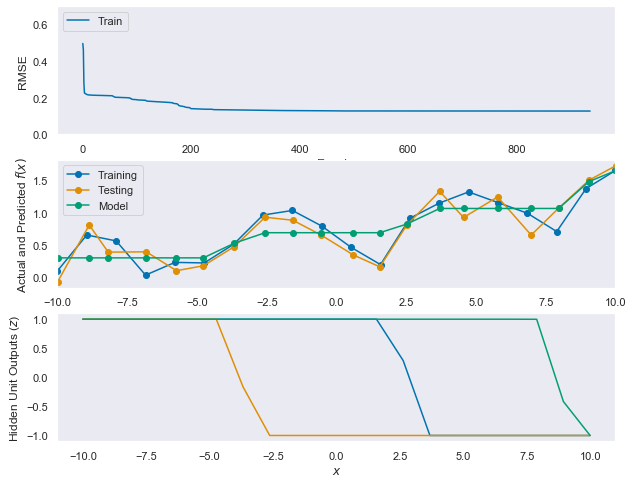

In [50]:
nn = NeuralNet([1,3,1])
nn.train(X, T, ftracep=True) 
Ytest, Z = nn.use(Xtest, retZ=True)

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nn.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(X,T,'o-',Xtest,Ttest,'o-',Xtest,Ytest,'o-')
plt.xlim(-10,10)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(X, Z[1])
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

In [59]:
nn = NeuralNet([Xtrain.shape[1], 3, Ttrain.shape[1]]) 
nn.train(Xtrain, Ttrain)
t_pred = nn.use(Xtest)

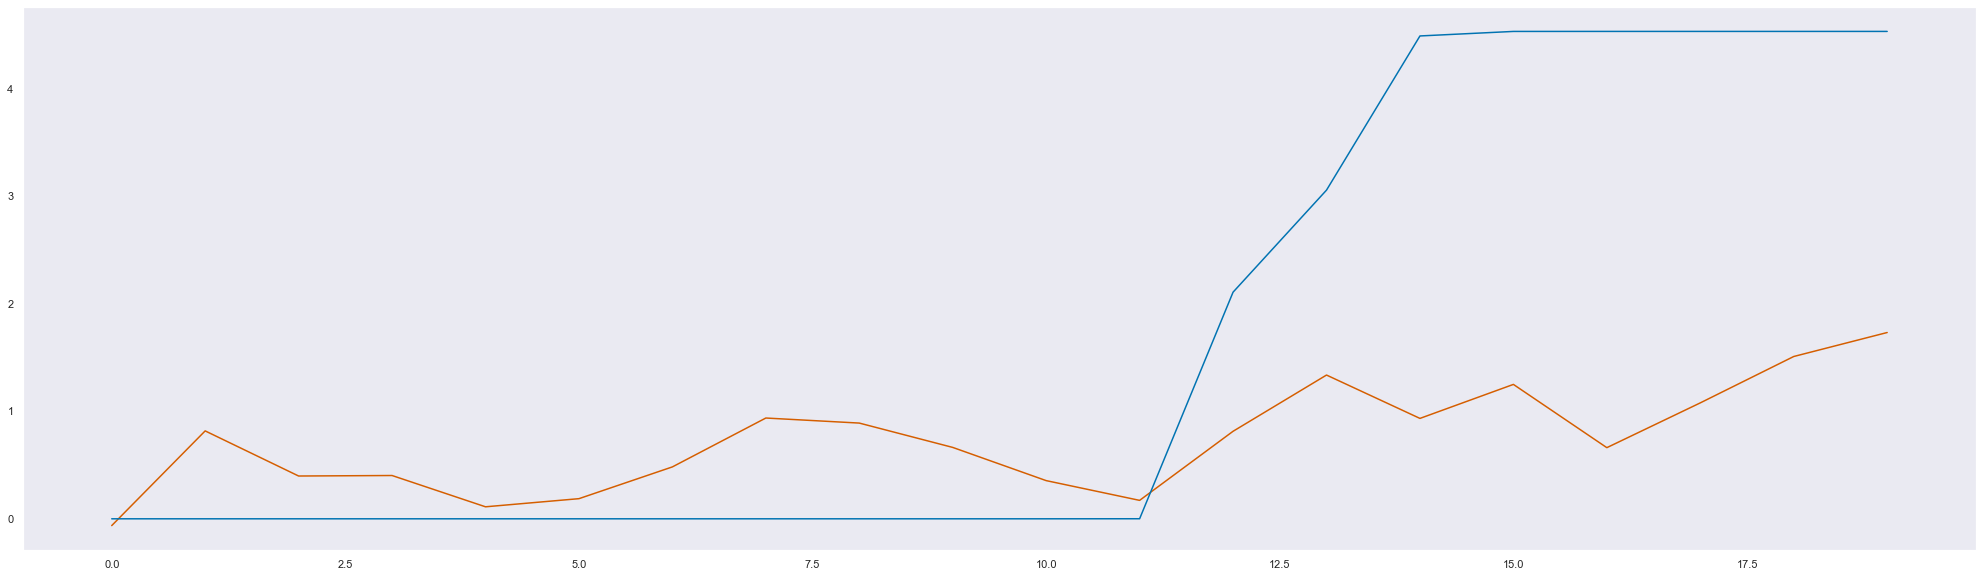

In [57]:
# This plot refers to the Non-linear regression run on complete dataset without cross validation.
plt.figure(figsize=(35,10))
plt.plot(Ttest[:100],'r')
plt.plot(t_pred[:100])


### Comparison of the tested models with CV errors
### Discussions about parameter/network structure choice

Please refer to another notebook for presentaion of CV results  

Accuracy of non-linear regression:  80.62407914817189 %
Train and Test of Non-linear regression 
RMSE: 0.2680243972249545
RMSE: 0.293299938688185

Accuracy mean of CV :  0.9681046788263282   
RMSE on training data:  0.5189353113196246 
RMSE on testing data:  0.5377481941361901 

Based on the above results, the accuracy of cross validation is better than non-linear regression. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. The smaller RMSE value, the better model. However, my RMSE values of both training and testing data are almost similar which mean my model is good. Choosing the right “k” value might be one of the reasons of giving a good RMSE in cross validation. 

# Conclusions

From this assignment, I have a clear picture of how neural network works and how we can perform regression by applying it. Also, I have learnt the logic of k-fold cross validation without using SKLEARN. It is quite challenge for me since all of the resources and materials are improting libraries to apply k-fold cross validation. Furthremore, I came to understand that there is different variations on Cross-Validation such as LOOCV, stratified and repeated.

# References

https://stats.stackexchange.com/questions/266225/step-by-step-explanation-of-k-fold-cross-validation-with-grid-search-to-optimise

https://enlight.nyc/projects/neural-network/

https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn

https://www.pluralsight.com/guides/non-linear-regression-trees-scikit-learn

https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test
